In [16]:
import cv2
import numpy as np
import torch
from torch.autograd import Variable
from torchvision import models
import matplotlib.pyplot as plt
import os
import torch.nn as nn

In [17]:
def preprocess_image(cv2im, resize_im=True):

    # Resize image
    if resize_im:
        cv2im = cv2.resize(cv2im, (224, 224))
    im_as_arr = np.float32(cv2im)
    im_as_arr = np.ascontiguousarray(im_as_arr[..., ::-1])
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
    # Convert to float tensor
    im_as_ten = torch.from_numpy(im_as_arr).float()
    # Add one more channel to the beginning. Tensor shape = 1,3,224,224
    im_as_ten.unsqueeze_(0)
    # Convert to Pytorch variable
    im_as_var = Variable(im_as_ten, requires_grad=True)
    return im_as_var

In [24]:
class Pretrained_VGGNet():
    def __init__(self,img_path):
        self.img_path=img_path
        # Load pretrained model
        self.pretrained_model = models.vgg16(pretrained=True)
        self.pretrained_model.eval()
    def process_image(self):
        img=cv2.imread(self.img_path)
        img=preprocess_image(img)
        return img

    def get_single_feature(self):
        # Get the feature map
        features=self.get_feature()
        feature=features[:,0,:,:]
        feature=feature.view(feature.shape[1],feature.shape[2])

        #print(features)
        #print(feature.shape)
        return feature

    def plot_probablity(self,outputs):

        outputs = outputs.data.numpy()
        outputs = np.ndarray.tolist(outputs)

        x = range(0, 1000)
        plt.bar(x, outputs[0])
        plt.xlabel("Class")
        plt.ylabel("Probablity")
        plt.title("Image classifier")
        plt.show()

    def predict(self):
        input=self.process_image()
        outputs = self.pretrained_model(input)

        s = torch.nn.Softmax(dim=1)
        result = s(outputs)
        self.plot_probablity(result)

        prob, predicted = result.sort(1,descending=True)
        prob = prob.data.numpy()

        predicted = predicted.data.numpy()
        
        print("Probablity TOP-3:\n")
        print("")
        for i in range(3):
            
            print("TOP_"+str(i+1))
            print("Probablity:{}".format(prob[0][i]))
            print("Predicted:{}\n".format(c[int(predicted[0][i])]))
        return outputs

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

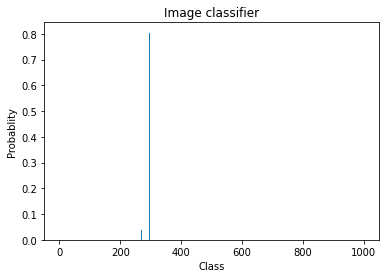

Probablity TOP-3:


TOP_1
Probablity:0.804244875907898
Predicted: 'ice bear

TOP_2
Probablity:0.14214567840099335
Predicted: 'Arctic fox

TOP_3
Probablity:0.03769978880882263
Predicted: 'white wolf



In [32]:
if __name__=='__main__':
  # get class
  c = {}
  with open("imagenet1000_clsidx_to_labels.txt") as f:
    for line in f:
      (key, val) = line.split(":")
      c[int(key)] = val.split(",")[0]
  # Define image path
  myClass=Pretrained_VGGNet('./ice_bear.jpg')
  print(myClass.pretrained_model)
  myClass.predict()